### Conditions description:
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc



/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [3]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe for 1st scores 
c1_pc_df1 = pd.DataFrame()
c2_pc_df1 = pd.DataFrame()
c3_pc_df1 = pd.DataFrame()
c4_pc_df1 = pd.DataFrame()

c1_wcs_df1 = pd.DataFrame()
c2_wcs_df1 = pd.DataFrame()
c3_wcs_df1 = pd.DataFrame()
c4_wcs_df1 = pd.DataFrame()

# Creat psudo-empty dataframe for 2nd scores 
c1_pc_df2 = pd.DataFrame()
c2_pc_df2 = pd.DataFrame()
c3_pc_df2 = pd.DataFrame()
c4_pc_df2 = pd.DataFrame()

c1_wcs_df2 = pd.DataFrame()
c2_wcs_df2 = pd.DataFrame()
c3_wcs_df2 = pd.DataFrame()
c4_wcs_df2 = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_mean1 = pc_c1[0, :] 
        c2_pc_mean1 = pc_c2[0, :] 
        c3_pc_mean1 = pc_c3[0, :] 
        c4_pc_mean1 = pc_c4[0, :] 
        
        c1_wcs_mean1 = wcs_c1[0, :] 
        c2_wcs_mean1 = wcs_c2[0, :] 
        c3_wcs_mean1 = wcs_c3[0, :] 
        c4_wcs_mean1 = wcs_c4[0, :] 
        
        c1_pc_mean2 = pc_c1[1, :] 
        c2_pc_mean2 = pc_c2[1, :] 
        c3_pc_mean2 = pc_c3[1, :] 
        c4_pc_mean2 = pc_c4[1, :] 
        
        c1_wcs_mean2 = wcs_c1[1, :] 
        c2_wcs_mean2 = wcs_c2[1, :] 
        c3_wcs_mean2 = wcs_c3[1, :] 
        c4_wcs_mean2 = wcs_c4[1, :] 
        
        # Appending data to df1
        c1_pc_df1[name] = c1_pc_mean1
        c2_pc_df1[name] = c2_pc_mean1
        c3_pc_df1[name] = c3_pc_mean1
        c4_pc_df1[name] = c4_pc_mean1
        
        c1_wcs_df1[name] = c1_wcs_mean1
        c2_wcs_df1[name] = c2_wcs_mean1
        c3_wcs_df1[name] = c3_wcs_mean1
        c4_wcs_df1[name] = c4_wcs_mean1
        
        # Appending data to df2
        c1_pc_df2[name] = c1_pc_mean2
        c2_pc_df2[name] = c2_pc_mean2
        c3_pc_df2[name] = c3_pc_mean2
        c4_pc_df2[name] = c4_pc_mean2
        
        c1_wcs_df2[name] = c1_wcs_mean2
        c2_wcs_df2[name] = c2_wcs_mean2
        c3_wcs_df2[name] = c3_wcs_mean2
        c4_wcs_df2[name] = c4_wcs_mean2

             
print("c1_pc_df1 shape: " + str(c1_pc_df1.shape))
print("c2_pc_df1 shape: " + str(c2_pc_df1.shape))
print("c3_pc_df1 shape: " + str(c3_pc_df1.shape))
print("c4_pc_df1 shape: " + str(c4_pc_df1.shape))

print("\nc1_wcs_df1 shape: " + str(c1_wcs_df1.shape))
print("c2_wcs_df1 shape: " + str(c2_wcs_df1.shape))
print("c3_wcs_df1 shape: " + str(c3_wcs_df1.shape))
print("c4_wcs_df1 shape: " + str(c4_wcs_df1.shape))

print("\nc1_pc_df2 shape: " + str(c1_pc_df2.shape))
print("c2_pc_df2 shape: " + str(c2_pc_df2.shape))
print("c3_pc_df2 shape: " + str(c3_pc_df2.shape))
print("c4_pc_df2 shape: " + str(c4_pc_df2.shape))

print("\nc1_wcs_df2 shape: " + str(c1_wcs_df2.shape))
print("c2_wcs_df2 shape: " + str(c2_wcs_df2.shape))
print("c3_wcs_df2 shape: " + str(c3_wcs_df2.shape))
print("c4_wcs_df2 shape: " + str(c4_wcs_df2.shape))

c1_pc_df1 shape: (400, 26)
c2_pc_df1 shape: (400, 26)
c3_pc_df1 shape: (400, 26)
c4_pc_df1 shape: (400, 26)

c1_wcs_df1 shape: (400, 26)
c2_wcs_df1 shape: (400, 26)
c3_wcs_df1 shape: (400, 26)
c4_wcs_df1 shape: (400, 26)

c1_pc_df2 shape: (400, 26)
c2_pc_df2 shape: (400, 26)
c3_pc_df2 shape: (400, 26)
c4_pc_df2 shape: (400, 26)

c1_wcs_df2 shape: (400, 26)
c2_wcs_df2 shape: (400, 26)
c3_wcs_df2 shape: (400, 26)
c4_wcs_df2 shape: (400, 26)


In [4]:
# Computing mean across participants for each condition
# 1st scores
c1_total_pc_mean1 = np.array(c1_pc_df1.mean(axis=1))
c2_total_pc_mean1 = np.array(c2_pc_df1.mean(axis=1))
c3_total_pc_mean1 = np.array(c3_pc_df1.mean(axis=1))
c4_total_pc_mean1 = np.array(c4_pc_df1.mean(axis=1))

print("c1_total_pc_mean1 shape: " + str(c1_total_pc_mean1.shape))
print("c2_total_pc_mean1 shape: " + str(c2_total_pc_mean1.shape))
print("c3_total_pc_mean1 shape: " + str(c3_total_pc_mean1.shape))
print("c4_total_pc_mean1 shape: " + str(c4_total_pc_mean1.shape))

c1_total_wcs_mean1 = np.array(c1_wcs_df1.mean(axis=1))
c2_total_wcs_mean1 = np.array(c2_wcs_df1.mean(axis=1))
c3_total_wcs_mean1 = np.array(c3_wcs_df1.mean(axis=1))
c4_total_wcs_mean1 = np.array(c4_wcs_df1.mean(axis=1))

print("\nc1_total_wcs_mean1 shape: " + str(c1_total_wcs_mean1.shape))
print("c2_total_wcs_mean1 shape: " + str(c2_total_wcs_mean1.shape))
print("c3_total_wcs_mean1 shape: " + str(c3_total_wcs_mean1.shape))
print("c4_total_wcs_mean1 shape: " + str(c4_total_wcs_mean1.shape))

# 2nd scores
c1_total_pc_mean2 = np.array(c1_pc_df2.mean(axis=1))
c2_total_pc_mean2 = np.array(c2_pc_df2.mean(axis=1))
c3_total_pc_mean2 = np.array(c3_pc_df2.mean(axis=1))
c4_total_pc_mean2 = np.array(c4_pc_df2.mean(axis=1))

print("\nc1_total_pc_mean2 shape: " + str(c1_total_pc_mean2.shape))
print("c2_total_pc_mean2 shape: " + str(c2_total_pc_mean2.shape))
print("c3_total_pc_mean2 shape: " + str(c3_total_pc_mean2.shape))
print("c4_total_pc_mean2 shape: " + str(c4_total_pc_mean2.shape))

c1_total_wcs_mean2 = np.array(c1_wcs_df2.mean(axis=1))
c2_total_wcs_mean2 = np.array(c2_wcs_df2.mean(axis=1))
c3_total_wcs_mean2 = np.array(c3_wcs_df2.mean(axis=1))
c4_total_wcs_mean2 = np.array(c4_wcs_df2.mean(axis=1))

print("\nc1_total_wcs_mean2 shape: " + str(c1_total_wcs_mean2.shape))
print("c2_total_wcs_mean2 shape: " + str(c2_total_wcs_mean2.shape))
print("c3_total_wcs_mean2 shape: " + str(c3_total_wcs_mean2.shape))
print("c4_total_wcs_mean2 shape: " + str(c4_total_wcs_mean2.shape))


c1_total_pc_mean1 shape: (400,)
c2_total_pc_mean1 shape: (400,)
c3_total_pc_mean1 shape: (400,)
c4_total_pc_mean1 shape: (400,)

c1_total_wcs_mean1 shape: (400,)
c2_total_wcs_mean1 shape: (400,)
c3_total_wcs_mean1 shape: (400,)
c4_total_wcs_mean1 shape: (400,)

c1_total_pc_mean2 shape: (400,)
c2_total_pc_mean2 shape: (400,)
c3_total_pc_mean2 shape: (400,)
c4_total_pc_mean2 shape: (400,)

c1_total_wcs_mean2 shape: (400,)
c2_total_wcs_mean2 shape: (400,)
c3_total_wcs_mean2 shape: (400,)
c4_total_wcs_mean2 shape: (400,)


## Compute high vs. low interference

In [5]:
# 1st scores
PC_low_int_1 = np.array((c1_total_pc_mean1 + c2_total_pc_mean1)/2)
PC_high_int_1 = np.array((c3_total_pc_mean1 + c4_total_pc_mean1)/2)

print("PC_low_int_1 shape: " + str(PC_low_int_1.shape))
print("PC_high_int_1 shape: " + str(PC_high_int_1.shape))

WCS_low_int_1 = np.array((c1_total_wcs_mean1 + c2_total_wcs_mean1)/2)
WCS_high_int_1 = np.array((c3_total_wcs_mean1 + c4_total_wcs_mean1)/2)

print("\nWCS_low_int_1 shape: " + str(WCS_low_int_1.shape))
print("WCS_high_int_1 shape: " + str(WCS_high_int_1.shape))

# 2nd scores
PC_low_int_2 = np.array((c1_total_pc_mean2 + c2_total_pc_mean2)/2)
PC_high_int_2 = np.array((c3_total_pc_mean2 + c4_total_pc_mean2)/2)

print("\nPC_low_int_2 shape: " + str(PC_low_int_2.shape))
print("PC_high_int_2 shape: " + str(PC_high_int_2.shape))

WCS_low_int_2 = np.array((c1_total_wcs_mean2 + c2_total_wcs_mean2)/2)
WCS_high_int_2 = np.array((c3_total_wcs_mean2 + c4_total_wcs_mean2)/2)

print("\nWCS_low_int_2 shape: " + str(WCS_low_int_2.shape))
print("WCS_high_int_2 shape: " + str(WCS_high_int_2.shape))

PC_low_int_1 shape: (400,)
PC_high_int_1 shape: (400,)

WCS_low_int_1 shape: (400,)
WCS_high_int_1 shape: (400,)

PC_low_int_2 shape: (400,)
PC_high_int_2 shape: (400,)

WCS_low_int_2 shape: (400,)
WCS_high_int_2 shape: (400,)


In [6]:
#np.log(WCS_low_int_1)
#np.log(c1_total_wcs_mean1)


## Get coordinates from each node

In [7]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [8]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Create Function to remove background and save images

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img


## Brain-plots


###  Brain-plot PC 1st score low interference


In [10]:
# Create Scene 
SC_PC1_low_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC1_low_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


In [11]:
# Colorbar default arguments. See `visbrain.objects.ColorbarObj`

def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    s_obj.color_sources(data=data, cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )

def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=data.max(), vmin=data.min(), limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4))
    scene.add_to_subplot(cb_proj, row=row, col=col) #, row_span=0.5, col_span=0.5
   

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


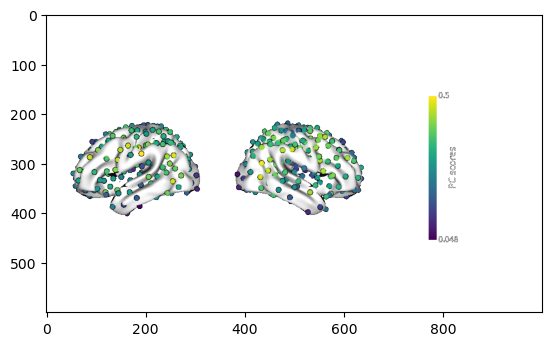

In [12]:
add_B3_to_scene(scene=SC_PC1_low_outer, data=PC_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_low_outer, data=PC_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_low_outer, data=PC_low_int_1, row=0, col=2, cbtitle="PC scores")
#SC_PC1_low_outer.preview()

SC_PC1_low_outer = RemoveBackground(SC_PC1_low_outer)
plt.imshow(SC_PC1_low_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


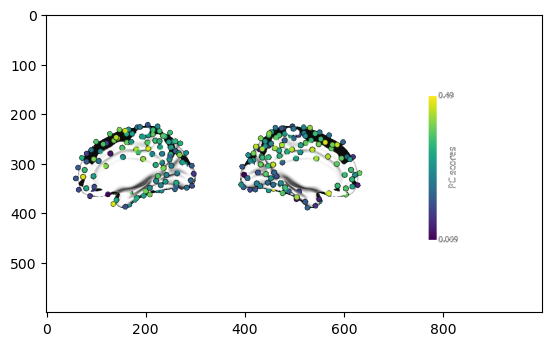

In [13]:
add_B3_to_scene(scene=SC_PC1_low_inner, data=PC_low_int_1[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_PC1_low_inner, data=PC_low_int_1[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_PC1_low_inner, data=PC_low_int_1, row=0, col=2, cbtitle="PC scores")

SC_PC1_low_inner = RemoveBackground(SC_PC1_low_inner)
plt.imshow(SC_PC1_low_inner)
plt.show()

###  Brain-plot PC 1st score high interference


In [14]:
# Create Scene 
SC_PC1_high_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC1_high_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


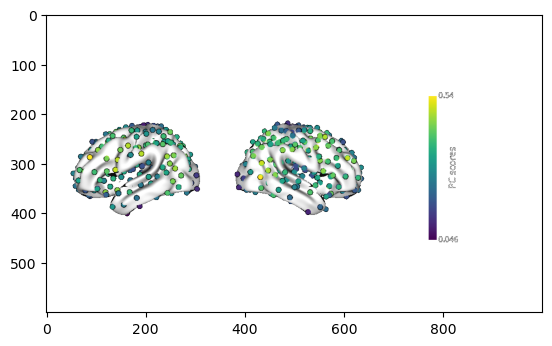

In [15]:
add_B3_to_scene(scene=SC_PC1_high_outer, data=PC_high_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC1_high_outer, data=PC_high_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_high_outer, data=PC_high_int_1, row=0, col=2, cbtitle="PC scores")

SC_PC1_high_outer = RemoveBackground(SC_PC1_high_outer)
plt.imshow(SC_PC1_high_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


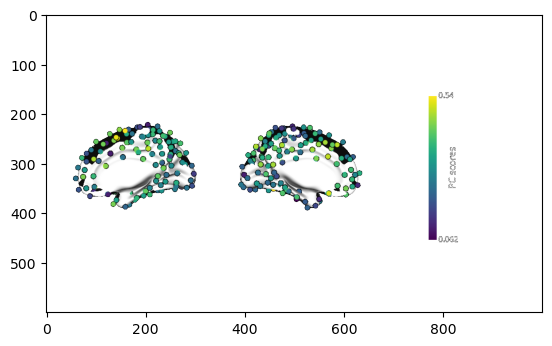

In [16]:
add_B3_to_scene(scene=SC_PC1_high_inner, data=PC_high_int_1[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_PC1_high_inner, data=PC_high_int_1[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_PC1_high_inner, data=PC_high_int_1, row=0, col=2, cbtitle="PC scores")

SC_PC1_high_inner = RemoveBackground(SC_PC1_high_inner)
plt.imshow(SC_PC1_high_inner)
plt.show()

###  Brain-plot PC 2nd score low interference


In [17]:
# Create Scene 
SC_PC2_low_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC2_low_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


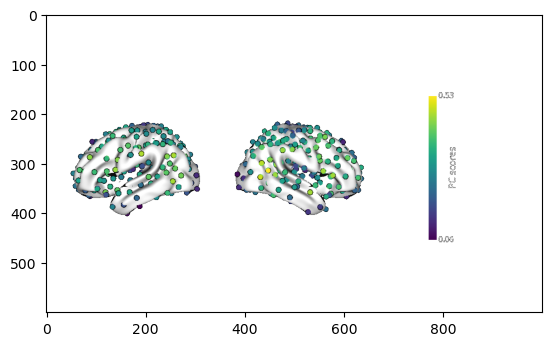

In [18]:
add_B3_to_scene(scene=SC_PC2_low_outer, data=PC_low_int_2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC2_low_outer, data=PC_low_int_2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC2_low_outer, data=PC_low_int_2, row=0, col=2, cbtitle="PC scores")

SC_PC2_low_outer = RemoveBackground(SC_PC2_low_outer)
plt.imshow(SC_PC2_low_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


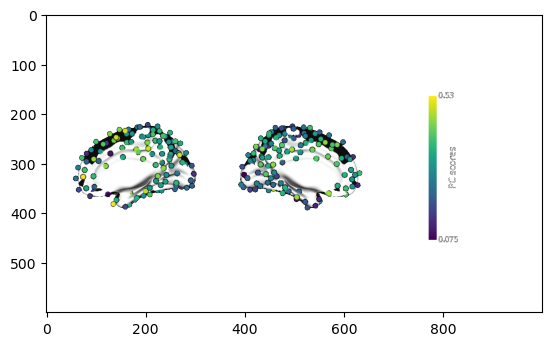

In [19]:
add_B3_to_scene(scene=SC_PC2_low_inner, data=PC_low_int_2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_PC2_low_inner, data=PC_low_int_2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_PC2_low_inner, data=PC_low_int_2, row=0, col=2, cbtitle="PC scores")

SC_PC2_low_inner = RemoveBackground(SC_PC2_low_inner)
plt.imshow(SC_PC2_low_inner)
plt.show()

###  Brain-plot PC 2nd score high interference


In [20]:
# Create Scene 
SC_PC2_high_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC2_high_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


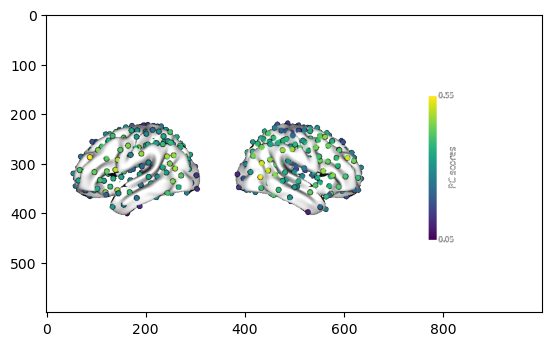

In [21]:
add_B3_to_scene(scene=SC_PC2_high_outer, data=PC_high_int_2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_PC2_high_outer, data=PC_high_int_2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC2_high_outer, data=PC_high_int_2, row=0, col=2, cbtitle="PC scores")

SC_PC2_high_outer = RemoveBackground(SC_PC2_high_outer)
plt.imshow(SC_PC2_high_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


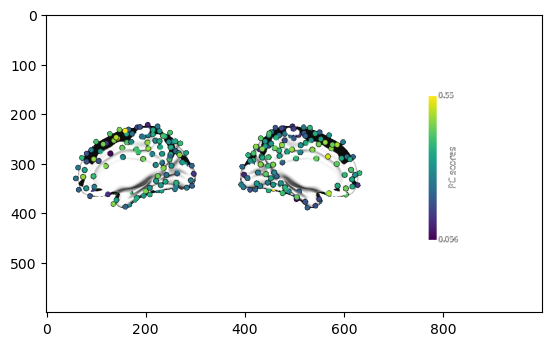

In [22]:
add_B3_to_scene(scene=SC_PC2_high_inner, data=PC_high_int_2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_PC2_high_inner, data=PC_high_int_2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_PC2_high_inner, data=PC_high_int_2, row=0, col=2, cbtitle="PC scores")

SC_PC2_high_inner = RemoveBackground(SC_PC2_high_inner)
plt.imshow(SC_PC2_high_inner)
plt.show()

###  Brain-plot WCS 1st score low interference


In [23]:
# Create Scene 
SC_WCS1_low_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_WCS1_low_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


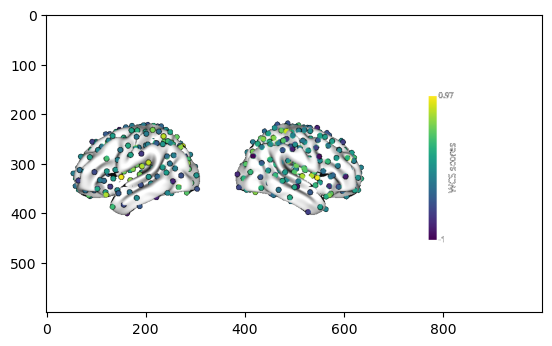

In [24]:
add_B3_to_scene(scene=SC_WCS1_low_outer, data=WCS_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_WCS1_low_outer, data=WCS_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_WCS1_low_outer, data=WCS_low_int_1, row=0, col=2, cbtitle="WCS scores")

SC_WCS1_low_outer = RemoveBackground(SC_WCS1_low_outer)
plt.imshow(SC_WCS1_low_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


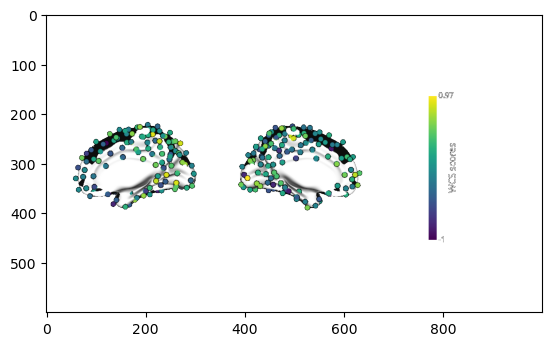

In [25]:
add_B3_to_scene(scene=SC_WCS1_low_inner, data=WCS_low_int_1[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_WCS1_low_inner, data=WCS_low_int_1[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_WCS1_low_inner, data=WCS_low_int_1, row=0, col=2, cbtitle="WCS scores")

SC_WCS1_low_inner = RemoveBackground(SC_WCS1_low_inner)
plt.imshow(SC_WCS1_low_inner)
plt.show()

###  Brain-plot WCS 1st score high interference

In [26]:
# Create Scene 
SC_WCS1_high_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_WCS1_high_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


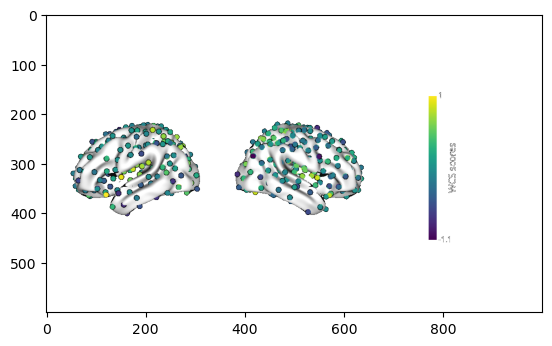

In [27]:
add_B3_to_scene(scene=SC_WCS1_high_outer, data=WCS_high_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_WCS1_high_outer, data=WCS_high_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_WCS1_high_outer, data=WCS_high_int_1, row=0, col=2, cbtitle="WCS scores")

SC_WCS1_high_outer = RemoveBackground(SC_WCS1_high_outer)
plt.imshow(SC_WCS1_high_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


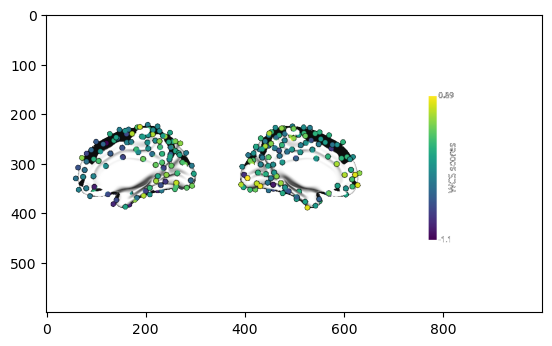

In [28]:
add_B3_to_scene(scene=SC_WCS1_high_inner, data=WCS_high_int_1[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_WCS1_high_inner, data=WCS_high_int_1[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_WCS1_high_inner, data=WCS_high_int_1, row=0, col=2, cbtitle="WCS scores")

SC_WCS1_high_inner = RemoveBackground(SC_WCS1_high_inner)
plt.imshow(SC_WCS1_high_inner)
plt.show()

###  Brain-plot WCS 2nd score low interference

In [29]:
# Create Scene 
SC_WCS2_low_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_WCS2_low_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


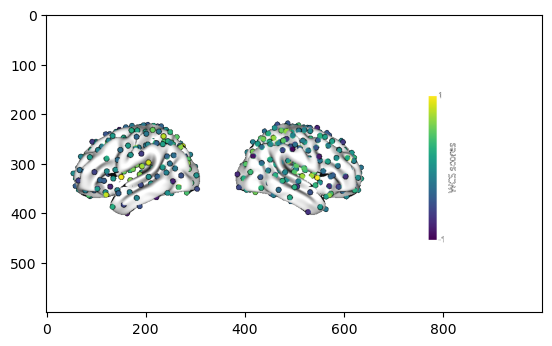

In [30]:
add_B3_to_scene(scene=SC_WCS2_low_outer, data=WCS_low_int_2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_WCS2_low_outer, data=WCS_low_int_2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_WCS2_low_outer, data=WCS_low_int_2, row=0, col=2, cbtitle="WCS scores")

SC_WCS2_low_outer = RemoveBackground(SC_WCS2_low_outer)
plt.imshow(SC_WCS2_low_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


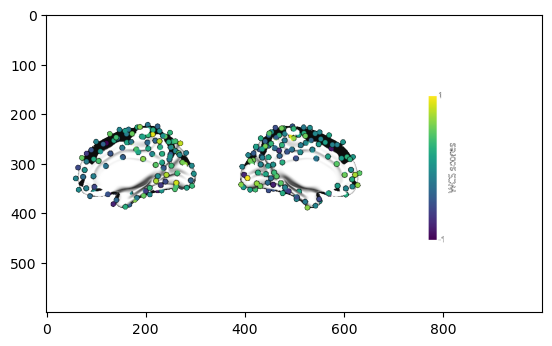

In [31]:
add_B3_to_scene(scene=SC_WCS2_low_inner, data=WCS_low_int_2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_WCS2_low_inner, data=WCS_low_int_2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_WCS2_low_inner, data=WCS_low_int_2, row=0, col=2, cbtitle="WCS scores")

SC_WCS2_low_inner = RemoveBackground(SC_WCS2_low_inner)
plt.imshow(SC_WCS2_low_inner)
plt.show()

###  Brain-plot WCS 2nd score high interference

In [32]:
# Create Scene 
SC_WCS2_high_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_WCS2_high_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


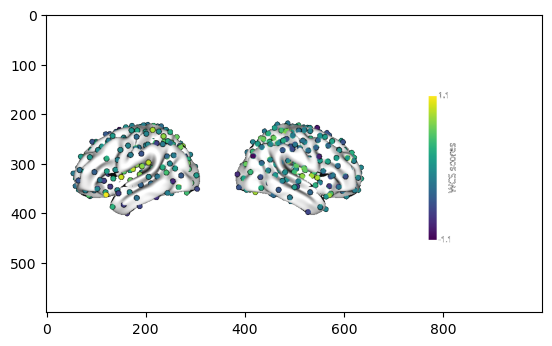

In [33]:
add_B3_to_scene(scene=SC_WCS2_high_outer, data=WCS_high_int_2, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_WCS2_high_outer, data=WCS_high_int_2, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_WCS2_high_outer, data=WCS_high_int_2, row=0, col=2, cbtitle="WCS scores")

SC_WCS2_high_outer = RemoveBackground(SC_WCS2_high_outer)
plt.imshow(SC_WCS2_high_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


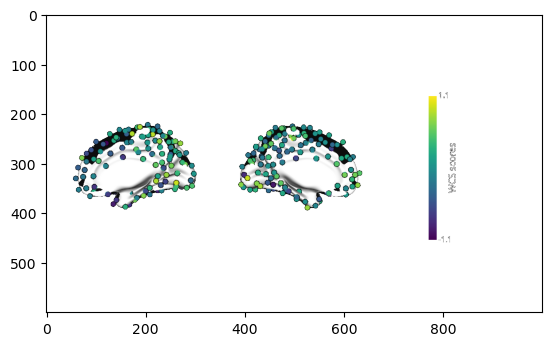

In [34]:
add_B3_to_scene(scene=SC_WCS2_high_inner, data=WCS_high_int_2[0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_WCS2_high_inner, data=WCS_high_int_2[200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_WCS2_high_inner, data=WCS_high_int_2, row=0, col=2, cbtitle="WCS scores")

SC_WCS2_high_inner = RemoveBackground(SC_WCS2_high_inner)
plt.imshow(SC_WCS2_high_inner)
plt.show()

## Alternative colorbars

In [106]:
from matplotlib import cm
import matplotlib as mpl
# Setting up colormap object 
# 'viridis' map with 100 different colors

cmap = mpl.cm
cmap.
norm = mpl.colors.Normalize(vmin=0, vmax=1)
viridis = cmap.get_cmap('viridis', 100)

print("color corresponding to value 0: " + str(viridis(norm(0))))
print("color corresponding to value 1: " + str(viridis(norm(1))))

print("\ncolor corresponding to value -1: " + str(viridis(norm(-1))))
print("color corresponding to value 2: " + str(viridis(norm(2))))

AttributeError: module 'matplotlib.cm' has no attribute 'get_clim'

In [105]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = viridis.colors
nodes = np.linspace(0, 1, 100)

cmap1 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

print("color corresponding to value 0: " + str(cmap1((0))))
print("color corresponding to value 1: " + str(cmap1((1))))

print("\ncolor corresponding to value -1: " + str(cmap1((-1))))
print("color corresponding to value 2: " + str(cmap1((2))))



color corresponding to value 0: (0.267004, 0.004874, 0.329415, 1.0)
color corresponding to value 1: (0.2681454117647059, 0.008659682352941176, 0.3340598470588235, 1.0)

color corresponding to value -1: (0.267004, 0.004874, 0.329415, 1.0)
color corresponding to value 2: (0.2692868235294118, 0.012445364705882353, 0.33870469411764703, 1.0)


In [117]:
viridis = cmap.get_cmap('viridis', 100)

def add_B3_to_scene_ac(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    #colors = viridis(data)
    s_obj = SourceObj('SourceExample', coords, **kwargs) #, colors=colors
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    s_obj.color_sources(data=data, cmap="viridis", vmax=1, vmin=0, clim=(0, 1))
    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True)
    
def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=1, vmin=0, limtxt=True, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4), under="gray", over="gray") #vmax=data.max(), vmin=data.min()
    scene.add_to_subplot(cb_proj, row=row, col=col) #, row_span=0.5, col_span=0.5


In [118]:
# Create Scene 
SC_PC1_low_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC1_low_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


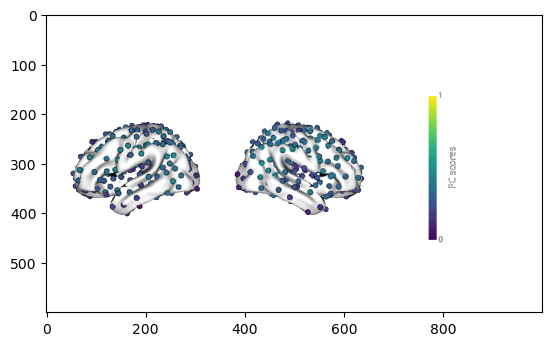

In [119]:
add_B3_to_scene_ac(scene=SC_PC1_low_outer, data=PC_low_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_ac(scene=SC_PC1_low_outer, data=PC_low_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_low_outer, data=PC_low_int_1, row=0, col=2, cbtitle="PC scores")
#SC_PC1_low_outer.preview()

SC_PC1_low_outer = RemoveBackground(SC_PC1_low_outer)
plt.imshow(SC_PC1_low_outer)
plt.show()

In [120]:
# Create Scene 
SC_PC1_high_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_PC1_high_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene


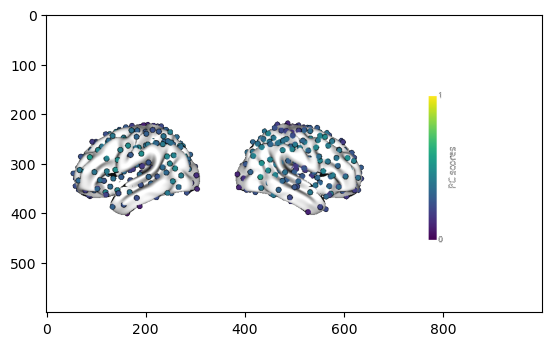

In [121]:
add_B3_to_scene_ac(scene=SC_PC1_high_outer, data=PC_high_int_1, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_ac(scene=SC_PC1_high_outer, data=PC_high_int_1, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_PC1_high_outer, data=PC_high_int_1, row=0, col=2, cbtitle="PC scores")

SC_PC1_high_outer = RemoveBackground(SC_PC1_high_outer)
plt.imshow(SC_PC1_high_outer)
plt.show()

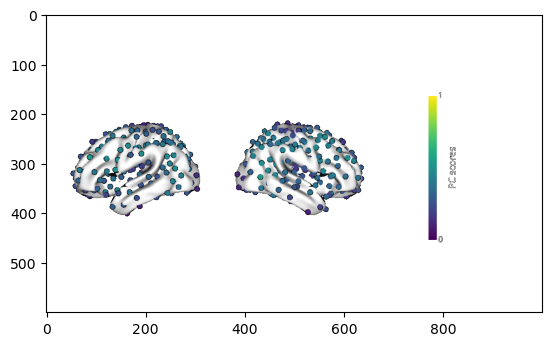

In [116]:
plt.imshow(SC_PC1_low_outer)
plt.imshow(SC_PC1_high_outer)
plt.show()

0.04806795037204842
0.4962976069386028
0.046216371043391595
0.5434951291066454


In [ ]:
#pip install -U vispy==0.5.3